# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# Your work here.
#basic info about dataset

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


Problem 1

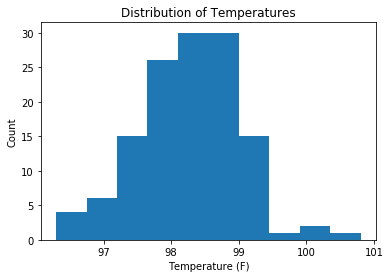

In [16]:
#Is the distribution of body temperatures normal?

import matplotlib.pyplot as plt

# Plot temperature distribution
plt.hist(df['temperature'], bins = 10)
plt.title('Body Temperature Distribution')
plt.xlabel('Body Temperature (F)')
plt.ylabel('Number of Obvservations')
plt.show()

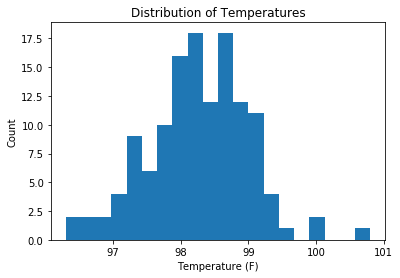

In [17]:
# The data looks roughly symmetrical and bell shaped with both large and small numbers of bins. 

plt.hist(df['temperature'], bins = 20)
plt.title('Distribution of Temperatures')
plt.xlabel('Temperature (F)')
plt.ylabel('Count')
plt.show()


In [22]:
# use normaltest to check normality
from scipy.stats import normaltest

sk, p = normaltest(df['temperature'])

print('Using the scipy normal test, the distribution of body temperatures appears to be normal,')
print('given that the p-value for the normality test is: {}'.format(p))
print('Since the p-value is greater than 0.05, We fail to reject the null hypothesis that the distribution is normal.')

Using the scipy normal test, the distribution of body temperatures appears to be normal,
given that the p-value for the normality test is: 0.2587479863488254
Since the p-value is greater than 0.05, We fail to reject the null hypothesis that the distribution is normal.


Problem 2

In [29]:
#Is the sample size large? Are the observations independent?

len(df['temperature'])

print('The sample size is 130 which is large, and is greater than 30, the lower limit to use the Central Limit Theorem.')
print('If the observations all come from different individuals, we can assume they are independent because my body temperature should not affect another persons body temperature')
print('Checking the dataset in question, the temperatures come from 148 different healthy men and women, so we can assume the observations are independent')

The sample size is 130 which is large, and is greater than 30, the lower limit to use the Central Limit Theorem.
If the observations all come from different individuals, we can assume they are independent because my body temperature should not affect another persons body temperature
Checking the dataset in question, the temperatures come from 148 different healthy men and women, so we can assume the observations are independent


Problem 3

In [ ]:
#Is the true population mean really 98.6 degrees F?
#Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
#In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
#Now try using the other test. How is the result be different? Why?

In [31]:
# Bootstrap Hypothesis Test
size = 1000
bootstrap_replicates = np.empty(size)
for i in range(size):
    bootstrap_replicates[i] = np.mean(np.random.choice(df['temperature'],len(df['temperature'])))
    
# Compute fraction of replicates that are equal to the 98.6
bootstrap_replicates = np.around(bootstrap_replicates, decimals=1) 
p = np.sum(bootstrap_replicates == 98.6) / size
print('The null hypothesis is that claim that the bootstrap replicate means of body temperature are equal to 98.6.')
print('Given that p-value for bootstrap hypothesis test = ', p, ', we reject the null hypothesis.')

The null hypothesis claims that the bootstrap replicate means of body temperature is equal to 98.6.
Given that p-value for bootstrap hypothesis test =  0.0 , we reject the null hypothesis.


In [38]:
print('I would use a one-sample test because we are given one sample. In this situation, it is most appropriate to use a t statistic')
print('because the population standard deviation is unknown.')

I would use a one-sample test because we are given one sample. In this situation, it is most appropriate to use a t statistic
because the population standard deviation is unknown.


In [ ]:
#In this case, the null hypothesis is that the true population average is 98.6 degrees Fahrenheit
#The alternative hypothesis is that the true population average is not 98.6 degrees Fahrenheit

In [47]:
from scipy import stats
t = stats.ttest_1samp(df.temperature, 98.6)[0]
p = stats.ttest_1samp(df.temperature, 98.6)[1]

print('t-statistic:', t)
print('p-value:', p)

print("P-value is below the alpha level so we can reject the null hypothesis that 98.6 degrees Fahrenheit is the true population average for body temperature")

t-statistic: -5.4548232923645195
p-value: 2.4106320415561276e-07
P-value is below the alpha level so we can reject the null hypothesis that 98.6 degrees Fahrenheit is the true population average for body temperature


In [55]:
# Since we don't know the true population standard deviation, z-statistic is not appropriate. But since sample size is large,
#the z-statistic should approximate the t-statistic:

from statsmodels.stats.weightstats import ztest
z_score, z_pval = ztest(df['temperature'],value=98.6)
print('Z-Statistic is %d with a p-value of %s' %(abs(z_score),z_pval))
print("Both the Z and T statistic reject the null hypothesis")


Z-Statistic is 5 with a p-value of 4.9021570141012155e-08
Both the Z and T statistic reject the null hypothesis


Problem 4

In [ ]:
#Draw a small sample of size 10 from the data and repeat both frequentist tests.
#Which one is the correct one to use?
#What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

In [61]:
#random sample of 10 observations
np.random.seed(8)
rand_samp = np.random.choice(df['temperature'], size=10)

#t-test
rs_ttest,rs_t_pval = stats.ttest_1samp(a=rand_samp, popmean=98.6)

#z-test
rs_zscore, rs_z_pval = ztest(rand_samp,value=98.6)

#answers
print('Using the random sample of ten observations, the T-Statistic is %d with a p-value of %s' %(abs(rs_ttest),rs_t_pval))
print('Using the random sample of ten observation, the Z-Statistic is %d with a p-value of %s' %(abs(rs_zscore), rs_z_pval))

Using the random sample of ten observations, the T-Statistic is 2 with a p-value of 0.061743545576800306
Using the random sample of ten observation, the Z-Statistic is 2 with a p-value of 0.03294417538633106


In [ ]:
print("The correct test to use would be a T-test because we do not know population standard deviation")

In [62]:
print("At the 95% confidence level, we reject the null hypothesis using the Z-test, but we fail to reject the null using the T-test")
print("Since the p-value for t-test is greater than z, it shows the effect that degrees of freedom for a t-test can have on outcomes ")

At the 95% confidence level, we reject the null hypothesis using the Z-test, but we fail to reject the null using the T-test
Since the p-value for t-test is greater than z, it shows the effect that degrees of freedom for a t-test can have on outcomes 


Problem 5

In [ ]:
#At what temperature should we consider someone's temperature to be "abnormal"?
#As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
#Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [71]:
# 95% Confidence Interval, Bootstrap Replicate Approach
confidence_int = np.percentile(bootstrap_replicates, [2.5, 97.5]) 

# Margin of Error
margin_of_error = 1.96 * bootstrap_replicates.std()
print('We are 95% confident the true bodytemperature average lies between', confidence_int[0], ' and ', confidence_int[1], '.')
print('The margin of error, as computed from the bootstrap replicates, is: ', margin_of_error)
print('Statistically abnormal temperatures are ones that lie outside the confidence interval.')

We are 95% confident the true bodytemperature average lies between 98.1  and  98.4 .
The margin of error, as computed from the bootstrap replicates, is:  0.13461990010395838
Statistically abnormal temperatures are ones that lie outside the confidence interval.


In [72]:
# 95% Confidence Interval, Frequentist Approach
frequentist = df['temperature'].std() / np.sqrt(len(df['temperature']))

# Margin of Error
margin_of_error_t = 1.96 * frequentist 
print('We are 95% confident the true bodytemperature average lies between', np.mean(df['temperature']) - margin_of_error_t,
      ' and ', np.mean(df['temperature']) + margin_of_error_t, '.')
print('The margin of error, as computed from the t-test method, is: ', margin_of_error_t)
print('Statistically abnormal temperatures are ones that lie outside the confidence interval')

We are 95% confident the true bodytemperature average lies between 98.12319411222852  and  98.37526742623304 .
The margin of error, as computed from the t-test method, is:  0.12603665700226638
Statistically abnormal temperatures are ones that lie outside the confidence interval


Problem 6

In [ ]:
#Is there a significant difference between males and females in normal temperature?
#What testing approach did you use and why?
#Write a story with your conclusion in the context of the original problem.

In [82]:
males = df.temperature[df.gender == 'M']
females = df.temperature[df.gender == 'F']

# two-sample t-test
from scipy.stats import ttest_ind
genderttest, genderpval = stats.ttest_ind(a=males, b=females, equal_var=False)

print('The T-Statistic is %d with a p-value of %s' %(abs(genderttest), genderpval))

The T-Statistic is 2 with a p-value of 0.023938264182934196


In [86]:
print("I used a 2-sample t-test because we are comparing two different samples without knowing population standard deviations.")
print('Assuming 95% confidence, our p-value being less than 0.05 gives us evidence to reject the null hypothesis that males and       females have the same average body temperature.')
print('Since males and females have statistically significant different average body temperatures, the original claim that the average human body temperate is 98.6, seems suspect. Perhaps Carl Wunderlich made an error by not accounting for gender differences')

I used a 2-sample t-test because we are comparing two different samples without knowing population standard deviations.
Assuming 95% confidence, our p-value being less than 0.05 gives us evidence to reject the null hypothesis that males and       females have the same average body temperature.
Since males and females have statistically significant different average body temperatures, the original claim that the average human body temperate is 98.6, seems suspect. Perhaps Carl Wunderlich made an error by not accounting for gender differences
